# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Luthfia Rahmi Setyorini
- **Email:** luthfiarahmi09@gmail.com
- **ID Dicoding:** luthfiaarahmi

## Menentukan Pertanyaan Bisnis

- Bagaimana peran musim (season) terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh jenis hari (working day atau holiday) terhadap sewa sepeda harian?
- Pada hari apa sepeda paling banyak disewa?
- Bagaimana tren perubahan penyewaan sepeda dalam kurun waktu 1 tahun (2011-2012)?

## Import Semua Packages/Library yang Digunakan

Library yang digunakan dalam analisis dataset Bike Sharing ini adalah NumPy, Pandas, Matplotlib, dan Seaborn. NumPy digunakan untuk manipulasi data numerik, Pandas digunakan untuk membaca, mengolah, dan menganalisis data tabular, Matplotlib digunakan untuk membuat berbagai jenis plot dan grafik, sementara Seaborn digunakan untuk visualisasi data statistik dengan lebih mudah dan menarik. Dengan kombinasi keempat library ini, analisis dataset menjadi lebih efisien dan informatif, memungkinkan pengguna untuk mendapatkan wawasan yang mendalam dari data yang diteliti.

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan. Dataset yang dibutuhkan dapat diakses melalui tautan berikut: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset?resource=download)

Pada proyekakhir ini data yang akan kita gunakan terdiri dari 2 tabel. Oleh karena itu, pada tahap ini kita akan melakukan load terhadap kedua tabel tersebut.



*  **Load tabel day**

Data pertama yang harus kita muat ialah data dari tabel day. Berikut merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [225]:
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df.



*   **Load tabel hour**
Data selanjutnya yang harus kita muat ialah data dari tabel hour. Hal ini dapat dilakukan dengan menjalankan kode berikut.



In [226]:
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Data type**

Melakukan pengecekan kesesuaian tipe data

In [227]:
print('Dataframe day : ')
print(day_df.info())

print('\nDataframe hour : ')
print(hour_df.info())

Dataframe day : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17

Hasil eksekusi kode di atas menampilkan bahwa tidak terdapat missing value pada dataset yang ditandakan dengan kesamaan jumlah data pada tiap kolom, tetapi terdapat kesalahan tipe data pada kolom dteday dengan tipe data object yang mana seharusnya menggunakan tipe data datetime.

Namun, untuk memastikan lagi bahwa tidak ada missing values, maka kita jalankan kode berikut.

**Missing Value**

Melakukan pengecekan pada dataframe day_df dan hour_df apakah terdapat missing value atau tidak

In [228]:
print('Cek missing value pada dataframe day : ')
print(day_df.isna().sum())

print('\nCek missing value pada dataframe hour : ')
print(hour_df.isna().sum())

Cek missing value pada dataframe day : 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek missing value pada dataframe hour : 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Setelah melakukan eksekusi kode di atas dengan menggunakan method isna().sum(), telah terbukti bahwa tidak ada missing value pada dataset yang kita gunakan pada project ini. Hal ini dibuktikan dengan munculnya nilai 0 untuk setiap kolom pada dataset. Akan tetapi, terdapat kesalahan tipe data pada kolom dteday dengan tipe data object yang mana seharusnya menggunakan tipe data datetime.

**Duplicated data**

Selanjutnya, kita harus melakukan pengecekan duplikasi data. Untuk itu, mari kita jalankan kode di bawah ini :

In [229]:
print("Jumlah duplikasi (day) : ", day_df.duplicated().sum())
print("jumlah duplikasi (hour) : ", hour_df.duplicated().sum())

Jumlah duplikasi (day) :  0
jumlah duplikasi (hour) :  0


Setelah melakukan pemeriksaan duplikasi data, didapatkan bahwa data yang kita miliki tidak terdapat duplikasi data.



*   **Inaccurate Values**


Selanjutnya kita melakukan pengecekan inaccurate values menggunakan method .describe() pada tiap dataframe

Berikut merupakan kode yang harus dijalankan untuk mengecek innacurate value pada dataframe day_df.

In [230]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

* mengubah tipe data kolom 'dteday' yang tadinya object menjadi datetime

In [231]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [232]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [233]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

* mengubah kode menjadi keterangan pada tiap kolom agar menjadi lebih mudah dipahami

mengubah season

In [234]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

mengubah tahun

In [235]:
day_df.yr.replace((0,1), ('2011', '2012'), inplace=True)
hour_df.yr.replace((0,1), ('2011', '2012'), inplace=True)

mengubah bulan

In [236]:
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)

mengubah hari

In [237]:
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

mengubah cuaca

In [238]:
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow/Rain','Heavy_rainsnow'), inplace=True)
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow/Rain','Heavy_rainsnow'), inplace=True)

In [239]:
day_df.workingday.replace({0:'holiday', 1:'working_day'}, inplace=True)
hour_df.workingday.replace({0:'holiday', 1:'working_day'}, inplace=True)

In [240]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,holiday,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,holiday,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,working_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,working_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,working_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [252]:
day_df.describe(include="all")

<ipython-input-252-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,NaN,Saturday,working_day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [241]:
hour_df.describe(include="all")

<ipython-input-241-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,NaN,Saturday,working_day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [242]:
# mengelompokkan penyewa sepeda berdasarkan season
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

In [243]:
# melihat total penyewa sepeda berdasarkan season dan jenis hari
day_df.groupby(by=['season', 'workingday']).agg({'cnt': ['sum']})

cnt
                       sum
season workingday         
Fall   holiday      312056
       working_day  749073
Spring holiday      137683
       working_day  333665
Summer holiday      287976
       working_day  630613
Winter holiday      262554
       working_day  579059

In [244]:
# Mengelompokkan data berdasarkan jenis hari (working day atau holiday) dan menghitung rata-rata sewa sepeda harian
average_rentals_by_day_type = day_df.groupby('workingday')['cnt'].mean().astype(int)

# Menampilkan hasil
print("Rata-rata sewa sepeda pada hari kerja (working day)  :", average_rentals_by_day_type[1]) # 1 adalah working day
print("Rata-rata sewa sepeda pada hari libur (holiday)      :", average_rentals_by_day_type[0]) # 0 adalah holiday

Rata-rata sewa sepeda pada hari kerja (working day)  : 4584
Rata-rata sewa sepeda pada hari libur (holiday)      : 4330


In [245]:
# melihat total penyewa sepeda berdasarkan jenis hari
daily_rentals_avg = day_df.groupby(by='workingday').agg({'cnt': ['mean']}).astype(int)

# Menampilkan hasil
print(daily_rentals_avg)

              cnt
             mean
workingday       
holiday      4330
working_day  4584


In [246]:
# melihat total penyewa sepeda berdasarkan season dan jenis hari
avg_rent_on_weekday = day_df.groupby(by='weekday').agg({'cnt': ['mean']})
avg_rent_on_weekday['cnt'].astype(int)

,mean
weekday,
Friday,4690
Monday,4338
Saturday,4550
Sunday,4228
Thursday,4667
Tuesday,4510
Wednesday,4548


In [260]:
# melihat total penyewa sepeda berdasarkan jenis hari
day_df.groupby(by=['yr', 'mnth']).agg({'cnt': ['sum']})

cnt
              sum
yr   mnth        
2011 Jan    38189
     Feb    48215
     Mar    64045
     Apr    94870
     May   135821
     Jun   143512
     Jul   141341
     Aug   136691
     Sep   127418
     Oct   123511
     Nov   102167
     Dec    87323
2012 Jan    96744
     Feb   103137
     Mar   164875
     Apr   174224
     May   195865
     Jun   202830
     Jul   203607
     Aug   214503
     Sep   218573
     Oct   198841
     Nov   152664
     Dec   123713

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana peran musim (season) terhadap jumlah penyewaan sepeda?

<ipython-input-248-da8a774d18b7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


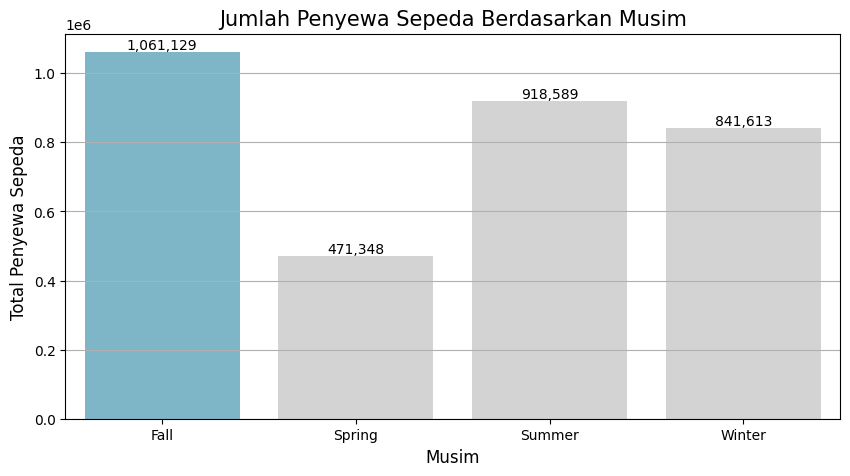

In [248]:
# Grouping by season and aggregating the sum of 'cnt'
by_season_df = day_df.groupby(by='season').agg({'cnt': 'sum'})

# Find the season with the highest sum
max_season = by_season_df['cnt'].idxmax()

# Define colors, setting a different color for the bar corresponding to the highest sum
colors = ["#D3D3D3"] * len(by_season_df.index)  # Set default color for all bars
max_season_index = by_season_df.index.get_loc(max_season)  # Get index of the season with the highest sum
colors[max_season_index] = "#72BCD4"  # Set different color for the bar with the highest sum

# Plotting
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=by_season_df.index,
    y='cnt',  # Specify the column name directly
    data=by_season_df,
    palette=colors  # Set colors
)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim', fontsize=15)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewa Sepeda', fontsize=12)
plt.grid(axis='y')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Pertanyaan 2: Bagaimana pengaruh jenis hari (working day atau holiday) terhadap sewa sepeda harian?

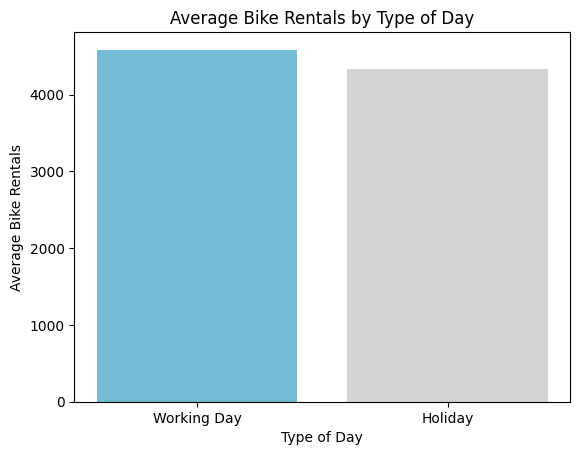

In [257]:
# Data
types_of_day = ['Working Day', 'Holiday']
average_rentals = [average_rentals_by_day_type[1], average_rentals_by_day_type[0]]

# Plotting bar chart
plt.bar(types_of_day, average_rentals, color=["#72BCD4","lightgrey"])
plt.xlabel('Type of Day')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Type of Day')
plt.show()

### Pertanyaan 3: Sepeda paling banyak disewa rata-rata pada hari apa?

<ipython-input-250-54a2bd0aee4e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


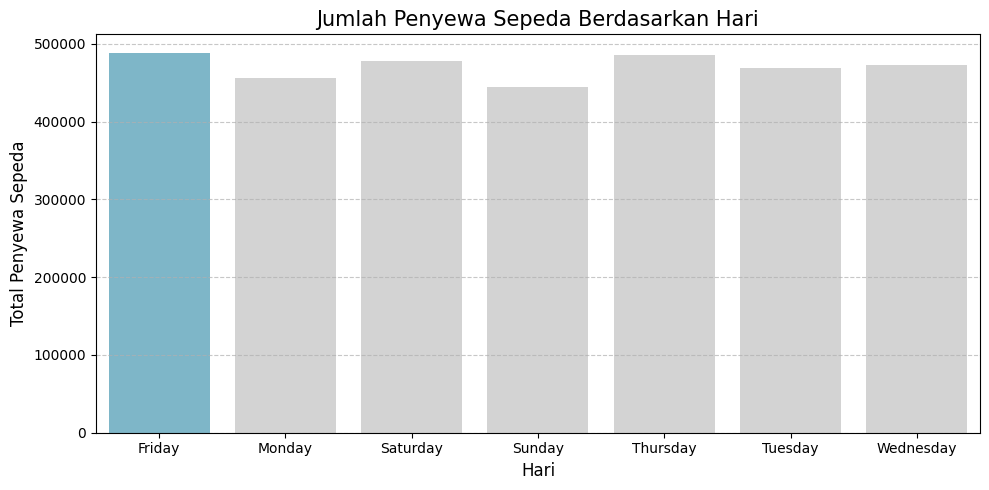

In [250]:
# Grouping by season and aggregating the sum of 'cnt'
by_day_df = day_df.groupby(by='weekday').agg({'cnt': 'sum'})

# Find the season with the highest sum
max_day = by_day_df['cnt'].idxmax()

# Define colors, setting a different color for the bar corresponding to the highest sum
colors = ["#D3D3D3"] * len(by_day_df.index)  # Set default color for all bars
max_day_index = by_day_df.index.get_loc(max_day)  # Get index of the season with the highest sum
colors[max_day_index] = "#72BCD4"  # Set different color for the bar with the highest sum

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(
    x=by_day_df.index,
    y='cnt',  # Specify the column name directly
    data=by_day_df,
    palette=colors  # Set colors
)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Hari', fontsize=15)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Total Penyewa Sepeda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana tren perubahan penyewaan sepeda dalam kurun waktu 1 tahun (2011-2012)?

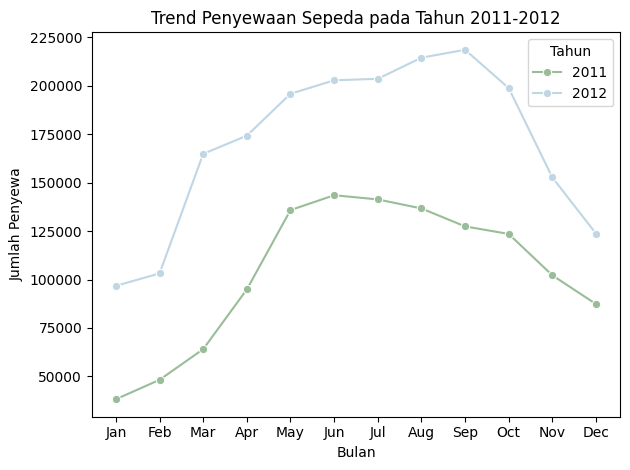

In [251]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=['mnth','yr']).agg({
    'cnt': 'sum'
}).reset_index()

colors = ["#99bd98", "#c0d6e4"]
sns.lineplot(
    data=monthly_counts,
    x='mnth',y='cnt',hue='yr',palette=colors,marker='o')

plt.title('Trend Penyewaan Sepeda pada Tahun 2011-2012')
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.legend(title='Tahun', loc='upper right')
plt.tight_layout()
plt.show()

## Conclusion

**Conclusion pertanyaan 1 : Bagaimana peran musim (season) terhadap jumlah penyewaan sepeda?**

Berdasarkan grafik di atas, musim gugur (Fall) menjadi musim dengan jumlah penyewa sepeda terbanyak. Jumlah penyewa sepeda pada musim gugur mencapai 1.061.129, yang merupakan jumlah tertinggi dibandingkan musim lainnya. Ini menunjukkan bahwa orang-orang cenderung lebih suka menyewa sepeda saat musim gugur. Hal ini bisa disebabkan oleh cuaca yang lebih nyaman atau karena banyaknya acara atau aktivitas yang lebih disukai pada musim tersebut.

**Conclusion pertanyaan 2 : Bagaimana pengaruh jenis hari (working day atau holiday) terhadap sewa sepeda harian?**

Rata-rata sejumlah peminjaman sepeda pada hari kerja (Working Day) sedikit lebih tinggi dibandingkan dengan hari libur (Holiday) dengan jumlah sekitar 4584 peminjaman pada hari kerja dan sekitar 4330 peminjaman pada hari libur. Hal ini menunjukkan bahwa meskipun masih ada permintaan sewa sepeda pada hari libur, permintaan tersebut sedikit lebih rendah dibandingkan dengan hari kerja.

**Conclusion pertanyaan 3 : Sepeda paling banyak disewa rata-rata pada hari apa?**

Berdasarkan visualisasi data di atas, terlihat bahwa rata-rata jumlah penyewaan sepeda tertinggi terjadi pada hari Jumat (Friday), dengan rata-rata sekitar 4690 penyewaan. Sedangkan, rata-rata jumlah penyewaan terendah terjadi pada hari Minggu (Sunday), dengan rata-rata sekitar 4228 penyewaan. Ini menunjukkan bahwa permintaan penyewaan sepeda cenderung lebih tinggi pada akhir pekan daripada hari-hari biasa dalam seminggu.

**Conclusion pertanyaan 4 : Bagaimana tren perubahan penyewaan sepeda dalam kurun waktu 1 tahun (2011-2012)?**

Hasil visualisasi data menunjukkan bagaimana perubahan jumlah penyewa sepeda  tiap bulannya sepanjang tahun 2011 hingga 2012.

Dari grafik tersebut, kita bisa melihat bahwa jumlah penyewaan sepeda cenderung naik di awal tahun dan mencapai puncaknya di pertengahan tahun, khususnya dari bulan Juni hingga Agustus. Setelah itu, jumlah penyewaan cenderung menurun menuju akhir tahun.

Hal yang menarik adalah, terjadi peningkatan yang lebih signifikan dalam jumlah penyewaan sepeda pada tahun 2012 dibandingkan dengan tahun 2011, terutama dari bulan Maret hingga September. Ini menunjukkan bahwa semakin banyak orang yang menyewa sepeda dari tahun ke tahun.

In [261]:
day_df.to_csv("Bike_Share_daily.csv", index=False)

In [263]:
hour_df.to_csv("Bike_Share_hourly.csv", index=False)